## Exploratory data Analysis  on dataset 'Indian Premier League'.
#### As a Sports Analyst, Find out the most succsessful teams, players and factors contributing win or loss of a team.
#### Suggest teams or players a company should endorse for its products

#### Dataset:- https://bit.ly/34SRn3b

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

#### Loading to dataframe

In [2]:
data_url = "/content/drive/MyDrive/Spark/"

matches = pd.read_csv(data_url+'matches.csv')
deliveries = pd.read_csv(data_url+'deliveries.csv')



In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
pd.set_option("display.max_columns", None)
deliveries .head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


## Data Cleaning

In [5]:
print("matches Shape before deleting duplicate values: {}.\n\n".format(matches.shape))
print("deliveries Shape before deleting duplicate values: {}.\n\n".format(deliveries.shape))

matches Shape before deleting duplicate values: (756, 18).


deliveries Shape before deleting duplicate values: (179078, 21).




In [6]:
# Removing duplicate rows if any
matches=matches.drop_duplicates()
deliveries=deliveries.drop_duplicates()
print("matches Shape After deleting duplicate values: {}.\n\n".format(matches.shape))
print("deliveries Shape After deleting duplicate values: {}.\n\n".format(deliveries.shape))

matches Shape After deleting duplicate values: (756, 18).


deliveries Shape After deleting duplicate values: (179055, 21).




## matches analysis 

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
# number of season

print (matches['season'].value_counts())
print ("number of seasons = ",len(matches['season'].unique()))

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64
number of seasons =  12


In [9]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### matches per season 

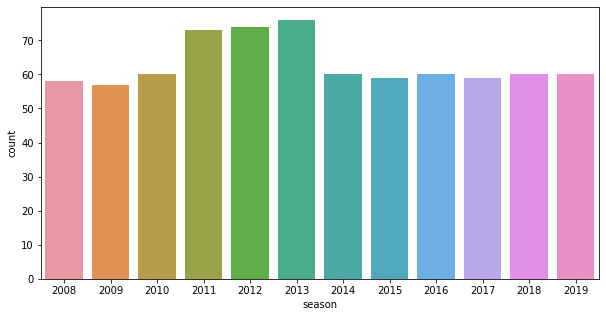

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='season', data=matches )
plt.show()

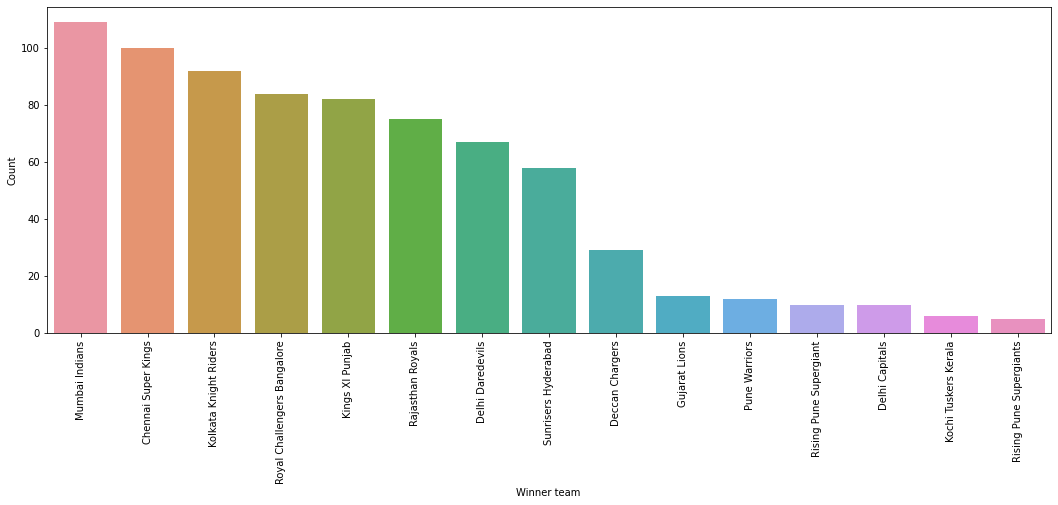

In [11]:
plt.figure(figsize=(18,6))
winner = matches.winner.value_counts()  
sns.barplot(x = winner.index, y = winner )
plt.xlabel('Winner team ')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## ==> so Mumbai indians has max number of winnings of all teams 

## teams win by runs / win by wickets in all seasons 

In [12]:
win_df = pd.DataFrame(matches.groupby(['winner'])[['win_by_runs', 'win_by_wickets']].sum())

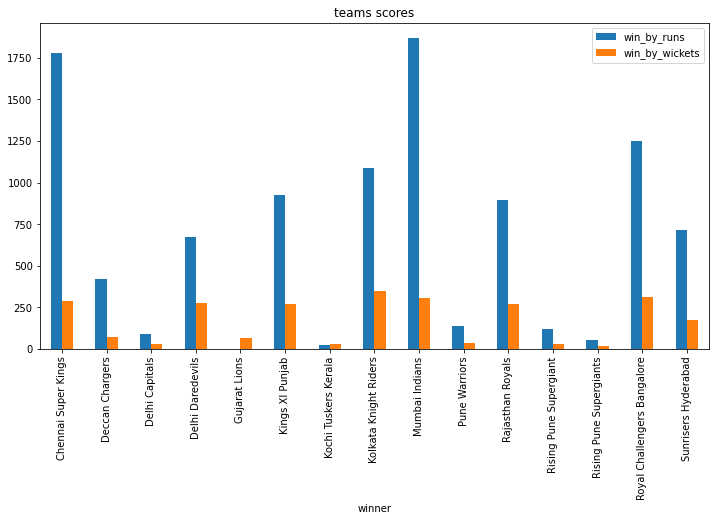

In [13]:

win_df.plot(y=['win_by_runs', 'win_by_wickets'], kind="bar",figsize=(12,6),title ="teams scores")

# winner / season 

In [14]:
win_season = (matches.groupby(['season','winner'])['winner']
         .agg([('n_win','count')])
         .reset_index())

temp = win_season.groupby(['season'])['n_win'].transform(max) == win_season['n_win']

win_season[temp]


,season,winner,n_win
6,2008,Rajasthan Royals,13
10,2009,Delhi Daredevils,10
21,2010,Mumbai Indians,11
24,2011,Chennai Super Kings,11
38,2012,Kolkata Knight Riders,12
47,2013,Mumbai Indians,13
54,2014,Kings XI Punjab,12
60,2015,Chennai Super Kings,10
64,2015,Mumbai Indians,10
75,2016,Sunrisers Hyderabad,11


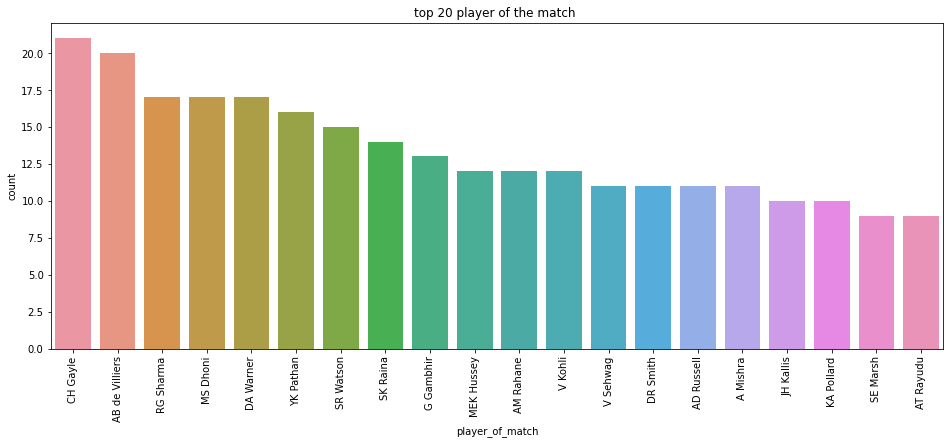

In [15]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='player_of_match', data=matches ,order=matches['player_of_match'].value_counts()[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('top 20 player of the match ')

plt.show()


# ==> CH Gayle , AB de villiers has the max number of player_of_match reword 

# venue with max number of matches played 

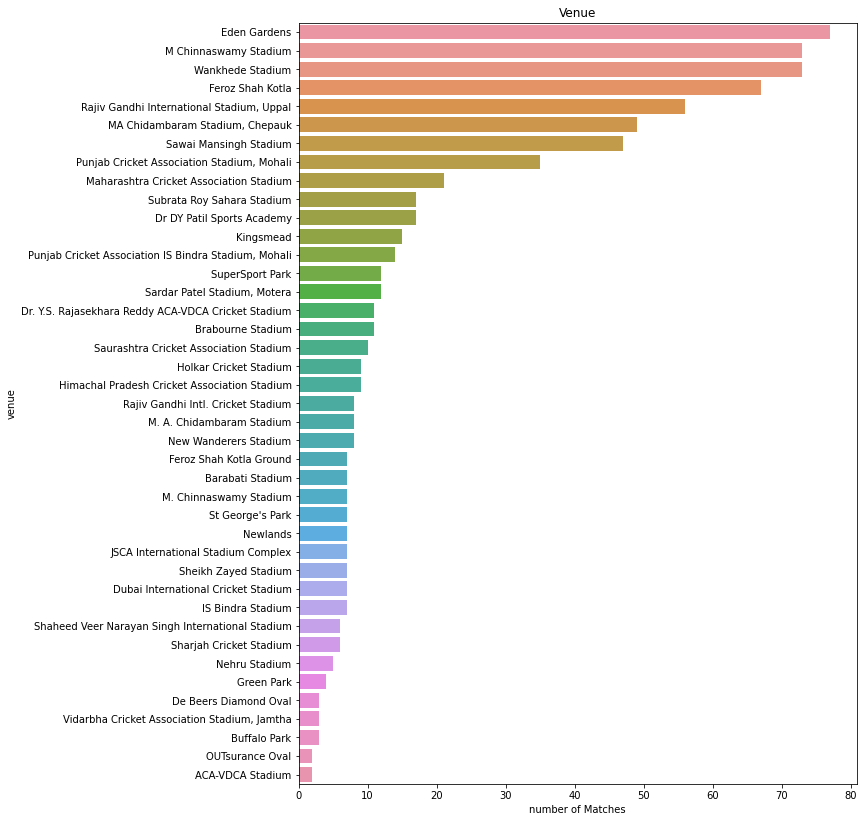

In [16]:

fig, ax = plt.subplots(figsize=(10, 14))

sns.countplot(y='venue', data=matches ,order=matches['venue'].value_counts().index)

plt.title('Venue')
plt.xlabel('number of Matches')
plt.ylabel('venue')
plt.show()


##==> so Eden Gardens venue max number of matches played

# get top 15 umpire

In [17]:
list1	= matches['umpire1'] .tolist()
list2= matches['umpire2'] .tolist()

In [18]:
list1.extend(list2)

umpire = pd.DataFrame(list1).dropna()
umpire=umpire.rename(columns = {0:'umpire'})
umpire.head()

,umpire
0,AY Dandekar
1,A Nand Kishore
2,Nitin Menon
3,AK Chaudhary
5,A Deshmukh


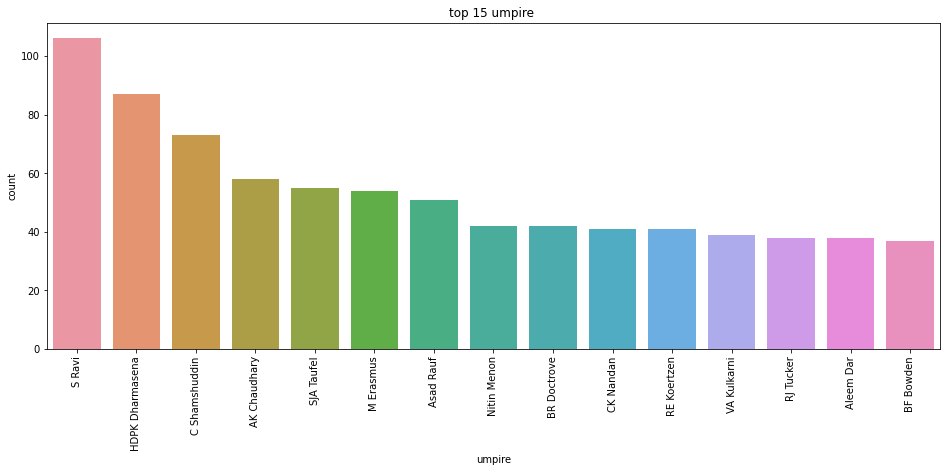

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='umpire', data=umpire ,order=umpire['umpire'].value_counts()[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('top 15 umpire ')

plt.show()


## ==> so SRavi and HDPK Dharmasena  has highest number of matches 

## deliveries analysis 

In [20]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [21]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [22]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


## Batsman

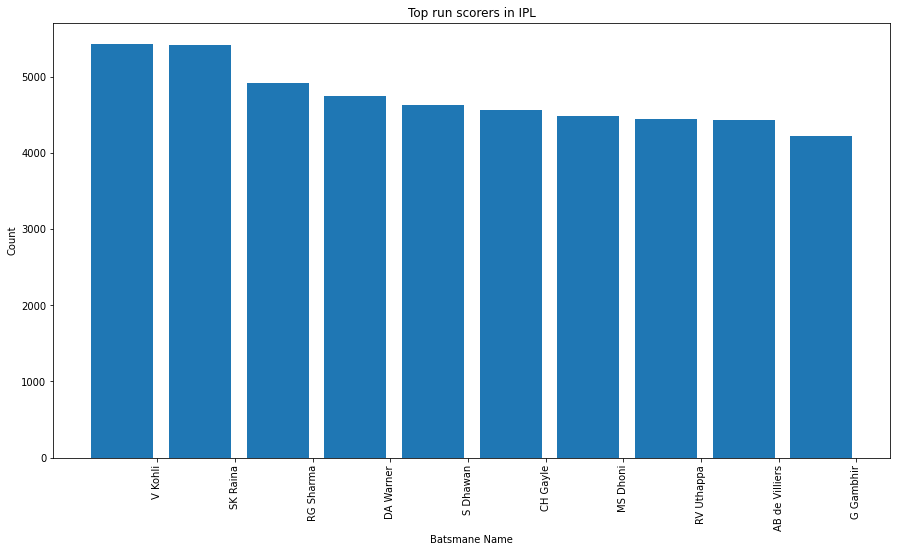

In [23]:
temp_df = deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(ind, np.array(temp_df['batsman_runs']))
ax.set_xticks(ind+((0.9)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
plt.show()

## ==> V Kohli  is the top scorer

# Conclusions

- 2013 season has the highest number of matches 

- Mumbai indians has max number of winnings of all teams 

- Mumbai indians highest win_by_runs and  kolkata knight riders highest win_by_wickets

- Rajasthan Royals	in 2008 has the highest number of winning matches in all seasons

- CH Gayle , AB de villiers has the max number of player_of_match reword

- Eden Gardens venue max number of matches played

- SRavi and HDPK Dharmasena has highest number of matches as umpire 

- V Kohli has the top scorer

